In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic classification dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=8, n_redundant=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DataFrame for easier handling
train_data = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X.shape[1])])
train_data['Target'] = y_train

test_data = pd.DataFrame(X_test, columns=[f"Feature_{i}" for i in range(X.shape[1])])
test_data['Target'] = y_test

In [3]:
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, max_features='sqrt', bootstrap=True):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Bootstrap sampling
            if self.bootstrap:
                indices = np.random.choice(len(X), size=len(X), replace=True)
                X_sample = X[indices]
                y_sample = y[indices]
            else:
                X_sample, y_sample = X, y

            # Train a decision tree
            tree = DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features)
            tree.fit(X_sample, y_sample)

            # Store the trained tree
            self.trees.append(tree)

    def predict(self, X):
        # Aggregate predictions from all trees
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Majority voting for classification
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

In [4]:
# Separate features and target
X_train_features = train_data.drop(columns=['Target']).values
y_train_target = train_data['Target'].values

# Instantiate and train the Random Forest
rf = RandomForest(n_estimators=50, max_depth=5, bootstrap=True)
rf.fit(X_train_features, y_train_target)

In [5]:
# Predict on test set
X_test_features = test_data.drop(columns=['Target']).values
y_test_target = test_data['Target'].values

y_pred = rf.predict(X_test_features)

# Calculate metrics
accuracy = accuracy_score(y_test_target, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8600


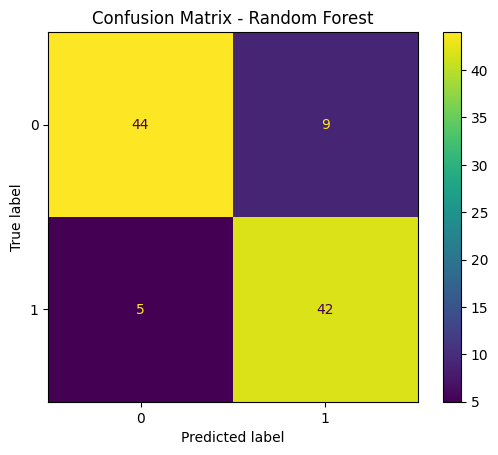

In [6]:
conf_matrix = confusion_matrix(y_test_target, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix - Random Forest")
plt.show()

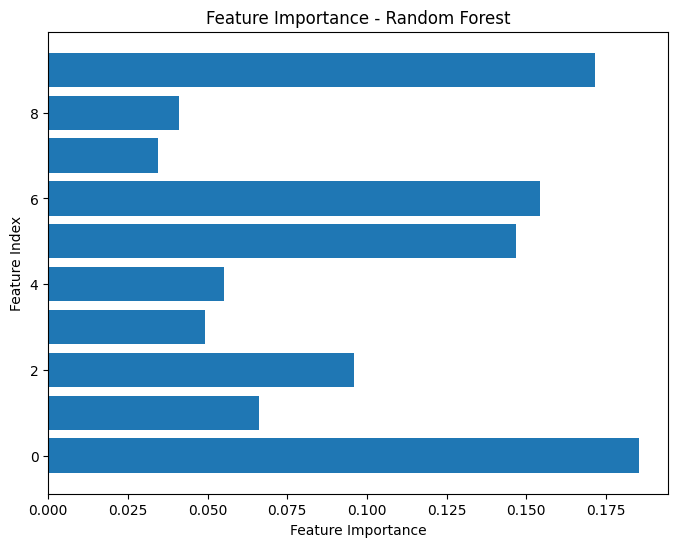

In [7]:
importances = np.zeros(X_train_features.shape[1])

for tree in rf.trees:
    importances += tree.feature_importances_

importances /= rf.n_estimators

plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.title("Feature Importance - Random Forest")
plt.show()